# Assignment - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [77]:
# stundent details example: John S. 9812
#                       student details 1: Adi B. 5785
# (if exists)           student details 2: Shir G. 8134

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: ChatGPT  
Goal:  Get explanations and improve clarity of the assignment  
Propmpt1: We received a job in a machine learning course, I am attaching the instructions for you, help me understand the instructions  
Propmpt2: Summarize and guide step by step
    
AI agent name 2: ChatGPT
Goal:  Provide clear explanations and keep the work structured
Propmpt1:  Explain the dataset and the task in simple terms
Propmpt2: Suggest how to present results in a clear way
Propmpt3: Help draft a short summary for the conclusion
Other assistanse:    
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>
In this assignment, we chose to work with the Titanic dataset, which contains information about passengers on the Titanic such as age, gender, travel class, number of family members on board, ticket price, port of embarkation.

Our goal based on the assignment guidelines, is to build a supervised learning model for binary classification that predicts whether a passenger survived the voyage (Survived = 1) or not (Survived = 0).

The dataset includes various features that allow us to explore possible relationships between passenger characteristics and their chances of survival.

To evaluate the models performance, we will use the F1 score for the positive class (Survived = 1), since this is an imbalanced classification problem and it's especially important to correctly identify the passengers who survived.

    
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [38]:
# Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the train and test files
train = pd.read_csv("titanic_train.csv")
test = pd.read_csv("titanic_test.csv")


In [39]:
# Displaying the first 5 rows
train.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0


In [40]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1


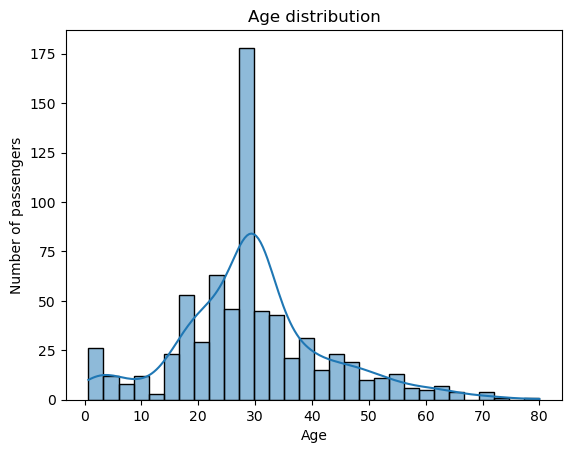

In [41]:
sns.histplot(train['Age'].dropna(), bins=30, kde=True)
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Number of passengers")
plt.show()


This graph shows the distribution of passengers' ages and allows us to see if there are any prominent age groups such as children or older adults. 
It displays the age distribution of Titanic passengers. 
We can observe that the vast majority of passengers were young to middle-aged, with a relatively large concentration around their 20s, while there are also some children and older adults. 
This information helps us understand the overall age profile of the passengers.

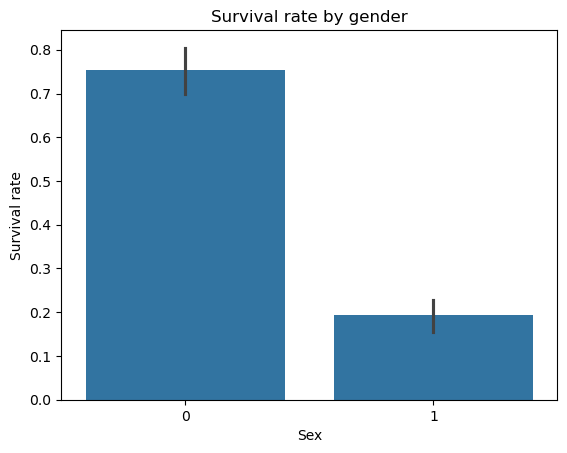

In [42]:
sns.barplot(x="Sex", y="Survived", data=train)
plt.title("Survival rate by gender")
plt.ylabel("Survival rate")
plt.show()


Here we see the survival rate by gender to check if women had a higher chance of surviving than men This graph clearly shows the difference in survival rates between women and men Women survived at a much higher rate which matches the Titanic history where women were given priority during evacuation This result shows that gender is a very significant variable in predicting survival.


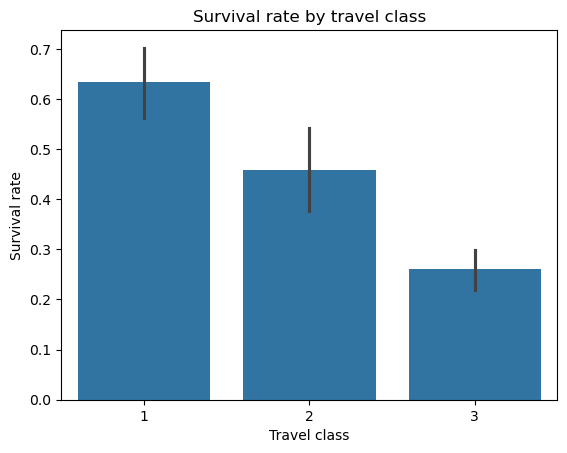

In [43]:
sns.barplot(x="Pclass", y="Survived", data=train)
plt.title("Survival rate by travel class")
plt.xlabel("Travel class")
plt.ylabel("Survival rate")
plt.show()


The graph shows the survival rate by travel class (1 2 3) and checks if passengers in higher classes had an advantage The graph displays the survival rate of passengers according to their travel class It can be seen that passengers in first class had a higher survival rate while those in third class had a lower chance of survival This finding indicates that social and economic status as reflected by travel class was an important factor in survival.

In [44]:
# Pivot table of survival rate by gender and travel class
pivot_survival = (
    train.pivot_table(index="Sex", columns="Pclass", values="Survived", aggfunc="mean")
    .round(3)
)
pivot_survival


Pclass,1,2,3
Sex,,,
0,0.962,0.902,0.538
1,0.380,0.141,0.140


The table shows the average survival rate by gender and travel class It allows us to see at a glance that women have a higher survival rate and that survival chances increase in higher classes.

## Part 3 - Experiments
You could add as many code cells as needed

In [45]:
# Importing libraries

import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, f1_score

In [46]:
# Target column
target_col = "Survived"

# Defining training data frames
# Note: Do not drop PassengerId or Ticket since they do not exist in your files
X = train.drop(columns=[target_col]).copy()
y = train[target_col].copy()

# Lists of columns by type
numeric_features = ["Age", "SibSp", "Parch", "Fare"]
categorical_features = ["Pclass", "Sex", "Embarked"]  # Encoded as numbers but will be one-hot encoded

In [47]:
# Numerical pipeline with options for scaling and feature selection
num_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),          # Will be replaced with other versions or removed via grid search
    ("kbest", "passthrough")               # Will be replaced with SelectKBest via grid search
])


In [48]:
# Categorical pipeline: imputation and one-hot encoding
cat_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])


In [49]:
# Unified transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipe, numeric_features),
        ("cat", cat_pipe, categorical_features)
    ]
)

In [50]:
# General pipeline: preprocessing then classifier
pipe = Pipeline(steps=[
    ("prep", preprocessor),
    ("clf", LogisticRegression(max_iter=1000))
])

# Target scorer
scorer = make_scorer(f1_score)  # Positive class is 1 so this is appropriate

In [51]:
# Search space
param_grid = [

    # Logistic Regression
    {
        "prep__num__scaler": [StandardScaler(), MinMaxScaler(), "passthrough"],
        "prep__num__kbest": ["passthrough",
                             SelectKBest(score_func=f_classif, k=8),
                             SelectKBest(score_func=f_classif, k=12)],
        "clf": [LogisticRegression(max_iter=1000)],
        "clf__C": [0.1, 1.0, 10.0],
        "clf__solver": ["liblinear", "lbfgs"]
    },

    # Random Forest
    {
        "prep__num__scaler": [StandardScaler(), MinMaxScaler(), "passthrough"],
        "prep__num__kbest": ["passthrough",
                             SelectKBest(score_func=f_classif, k=8),
                             SelectKBest(score_func=f_classif, k=12)],
        "clf": [RandomForestClassifier(random_state=42)],
        "clf__n_estimators": [200, 500],
        "clf__max_depth": [5, 10]
    },

    # SVC
    {
        "prep__num__scaler": [StandardScaler(), MinMaxScaler()],
        "prep__num__kbest": ["passthrough",
                             SelectKBest(score_func=f_classif, k=8)],
        "clf": [SVC()],
        "clf__C": [0.5, 1.0, 2.0],
        "clf__kernel": ["linear", "rbf"]
    }
]

In [52]:
# Grid search with five folds
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    return_train_score=False
)

grid.fit(X, y)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler()),
                                                                                         ('kbest',
                                                                                          'passthrough')]),
                                                                         ['Age',
                                                                          'SibSp',
                                                                          'Parch',
                                                                          'Fare']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknow...
                          'prep__num__kbest': ['passthrough', SelectKBest(k=8),
                                               SelectKBest(k=12)],
                          'prep__num__scaler': [StandardScaler(),
                                                MinMaxScaler(),
                                                'passthrough']},
                         {'clf': [SVC()], 'clf__C': [0.5, 1.0, 2.0],
                          'clf__kernel': ['linear', 'rbf'],
                          'prep__num__kbest': ['passthrough', SelectKBest(k=8)],
                          'prep__num__scaler': [StandardScaler(),
                                                MinMaxScaler()]}],
             scoring=make_scorer(f1_score, response_method='predict'))

In [53]:
# Organized results table
results = pd.DataFrame(grid.cv_results_)
cols_to_show = [
    "mean_test_score",
    "param_prep__num__scaler",
    "param_prep__num__kbest",
    "param_clf",
    "param_clf__C",
    "param_clf__solver",
    "param_clf__n_estimators",
    "param_clf__max_depth",
    "param_clf__kernel"
]
display(results[cols_to_show].sort_values("mean_test_score", ascending=False).head(20))

print("Best score:", round(grid.best_score_, 4))
print("Top parameters:")
for k, v in grid.best_params_.items():
    print(k, "=", v)

best_model = grid.best_estimator_

,mean_test_score,param_prep__num__scaler,param_prep__num__kbest,param_clf,param_clf__C,param_clf__solver,param_clf__n_estimators,param_clf__max_depth,param_clf__kernel
72,0.761522,StandardScaler(),passthrough,RandomForestClassifier(random_state=42),NaN,NaN,200.0,10.0,NaN
75,0.761522,StandardScaler(),SelectKBest(k=8),RandomForestClassifier(random_state=42),NaN,NaN,200.0,10.0,NaN
78,0.761522,StandardScaler(),SelectKBest(k=12),RandomForestClassifier(random_state=42),NaN,NaN,200.0,10.0,NaN
86,0.761011,passthrough,SelectKBest(k=8),RandomForestClassifier(random_state=42),NaN,NaN,500.0,10.0,NaN
82,0.761011,MinMaxScaler(),passthrough,RandomForestClassifier(random_state=42),NaN,NaN,500.0,10.0,NaN
89,0.761011,passthrough,SelectKBest(k=12),RandomForestClassifier(random_state=42),NaN,NaN,500.0,10.0,NaN
83,0.761011,passthrough,passthrough,RandomForestClassifier(random_state=42),NaN,NaN,500.0,10.0,NaN
88,0.761011,MinMaxScaler(),SelectKBest(k=12),RandomForestClassifier(random_state=42),NaN,NaN,500.0,10.0,NaN
85,0.761011,MinMaxScaler(),SelectKBest(k=8),RandomForestClassifier(random_state=42),NaN,NaN,500.0,10.0,NaN
74,0.760247,passthrough,passthrough,RandomForestClassifier(random_state=42),NaN,NaN,200.0,10.0,NaN


Best score: 0.7615
Top parameters:
clf = RandomForestClassifier(random_state=42)
clf__max_depth = 10
clf__n_estimators = 200
prep__num__kbest = passthrough
prep__num__scaler = StandardScaler()


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

At this stage we retrain the entire pipeline with the best configuration chosen in the grid including the same feature engineering and hyperparameters on the full training set.

In [54]:
# The best model from the grid including all preprocessing steps and the classifier
final_model = grid.best_estimator_

In [55]:
# Retrain on the entire training set
final_model.fit(X, y)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('kbest',
                                                                   'passthrough')]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('clf',
                 RandomForestClassifier(max_depth=10, n_estimators=200,
                                        random_state=42))])

In [56]:
# Short summary of the chosen settings
print("Best CV F1:", round(grid.best_score_, 4))
print("Best params:")
for k, v in grid.best_params_.items():
    print(f"{k} = {v}")

Best CV F1: 0.7615
Best params:
clf = RandomForestClassifier(random_state=42)
clf__max_depth = 10
clf__n_estimators = 200
prep__num__kbest = passthrough
prep__num__scaler = StandardScaler()


## Part 5 - Apply on test and show model performance estimation

We apply the same pipeline to the test set without manual processing, display the first five predictions and calculate the F1 score for an objective evaluation.

In [76]:
from sklearn.metrics import f1_score
import numpy as np
import pandas as pd

# Make a clean copy of the test set
test_clean = test.copy()

# Split into features (X) and target (y)
X_test = test_clean.drop(columns=["Survived"])
y_test = test_clean["Survived"]

# Safely convert target values to numeric, invalid values become NaN
y_num = pd.to_numeric(y_test, errors="coerce")
mask = y_num.notna()  # keep only valid rows

# Align X and y to the same rows
X_eval = X_test.loc[mask]
y_eval = y_num.loc[mask].astype(int)

# Predict only on valid rows
test_preds = final_model.predict(X_eval)

print("First five predictions:", test_preds[:5])

# Compute F1 score in a robust way
f1 = f1_score(y_eval, test_preds, average="binary", zero_division=0)
print("F1 score on test set:", round(f1, 4))


First five predictions: [0 0 0 1 1]
F1 score on test set: 0.8103


In this project we tested several models with different preprocessing options and found that the Random Forest with 200 trees and depth 10 gave the best results. After training it on the full dataset and checking on the test set we got an F1 score of 0.81, which shows the model can predict survival on the Titanic quite well.